# Deep Learning Exercise 2
#### By :- Sravanth Chowdary Potluri CS20B1006

Ex No. 2: Feed Forward & Back-Propagation Learning Algorithm for  Multiple Perceptron
Date: 08-02-2024
NOTE - Do not use inbuilt functions.
Implement the feedforward and backpropagation learning algorithm for multiple perceptrons in Python for the question provided in the attached image.
Initialize the weights and biases randomly.
Implement the forward pass.
Compute the loss between the predicted output and the actual output using an appropriate loss function.
Compute the gradients of the loss function with respect to the weights and biases using the chain rule.
Update the weights and biases.
Iterate over multiple times (epochs), performing forward propagation, loss calculation, backpropagation, and parameter updates in each iteration till convergence.


In [40]:
#Importing Required Libraries
import numpy as np

In [41]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [42]:
# Derivative Of Sigmoid Function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [43]:
class NeuralNetwork:
    # intializing the weights and biases
    def __init__(self,learning_rate=1):
        self.weights0_1 = np.random.rand(3, 2)
        self.weights1_2 = np.random.rand(3, 2)
        self.learning_rate = learning_rate

    def feedforward(self):
        self.hidden_layer_output = sigmoid(np.dot(self.input, self.weights0_1))
        # adding a bias term to the hidden layer
        self.hidden_layer_output = np.array([np.append(self.hidden_layer_output[0],1)])
        self.output = sigmoid(np.dot(self.hidden_layer_output, self.weights1_2))

    def backprop(self):
        #Application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights1_2 = np.dot(self.hidden_layer_output.T, (2*(self.output - self.y) * sigmoid_derivative(self.output)))
        back_prop_weights_1_2 = np.array([self.weights1_2[0],self.weights1_2[1]])
        back_prop_hidden_layer_output = np.array((self.hidden_layer_output[0][0],self.hidden_layer_output[0][1]))
        d_weights0_1 = np.dot(self.input.T,  (np.dot(2*(self.output - self.y) * sigmoid_derivative(self.output), back_prop_weights_1_2.T) * sigmoid_derivative(back_prop_hidden_layer_output)))

        #Applying gradient descent to update the weights
        self.weights1_2 -= self.learning_rate * d_weights1_2
        self.weights0_1 -= self.learning_rate * d_weights0_1


    # function to train the model
    def train(self, x, y,epochs=1000,early_stopping = True):
        self.input = x
        self.y = y
        loss = []
        for i in range(epochs):
            self.feedforward()
            self.backprop()
            # print(f"output at iteration {i} : {self.output}")
            print(f"Loss at iteration {i} : {self.mse()}")
            loss.append(self.mse())
            # print(f"weights at at iteration {i} : {self.return_weights()}")
            # defining stopping criterion if MSE is less than 0.0001
            if self.mse() < 0.0001 and early_stopping:
                print(f"Neural Network Converged at epoch {i} with loss {self.mse()}")
                break
        return loss


    # loss function
    def mse(self):
        return np.mean(np.square(self.y - self.output))
    # function to print the weights of the model when called
    def return_weights(self):
        return f"weights0_1 : {self.weights0_1} \nweights1_2 : {self.weights1_2}"

In [44]:
# creating a neural network object
nn = NeuralNetwork()

In [45]:
# training the model
nn.train(np.array([[1,0.7,1.2]]), np.array([[1,0]]))

Loss at iteration 0 : 0.29258859509599344
Loss at iteration 1 : 0.1761616519264237
Loss at iteration 2 : 0.10160506198634237
Loss at iteration 3 : 0.061351525271067235
Loss at iteration 4 : 0.03979898781062884
Loss at iteration 5 : 0.027546946068112643
Loss at iteration 6 : 0.020078781073859412
Loss at iteration 7 : 0.015237544549569347
Loss at iteration 8 : 0.01193592305262883
Loss at iteration 9 : 0.00958948784727475
Loss at iteration 10 : 0.007864743720371398
Loss at iteration 11 : 0.006561180768726268
Loss at iteration 12 : 0.005552728029336188
Loss at iteration 13 : 0.0047570301360391615
Loss at iteration 14 : 0.004118496991783471
Loss at iteration 15 : 0.0035985293738478603
Loss at iteration 16 : 0.0031696592590025356
Loss at iteration 17 : 0.0028119149355607274
Loss at iteration 18 : 0.002510497231300907
Loss at iteration 19 : 0.002254253740255216
Loss at iteration 20 : 0.0020346529111488036
Loss at iteration 21 : 0.0018450794059462865
Loss at iteration 22 : 0.001680340773572131

[0.29258859509599344,
 0.1761616519264237,
 0.10160506198634237,
 0.061351525271067235,
 0.03979898781062884,
 0.027546946068112643,
 0.020078781073859412,
 0.015237544549569347,
 0.01193592305262883,
 0.00958948784727475,
 0.007864743720371398,
 0.006561180768726268,
 0.005552728029336188,
 0.0047570301360391615,
 0.004118496991783471,
 0.0035985293738478603,
 0.0031696592590025356,
 0.0028119149355607274,
 0.002510497231300907,
 0.002254253740255216,
 0.0020346529111488036,
 0.0018450794059462865,
 0.0016803407735721315,
 0.0015363160461406926,
 0.0014097014716541187,
 0.0012978238835927543,
 0.0011985019123553911,
 0.0011099415277121836,
 0.0010306565454729476,
 0.0009594075104267462,
 0.0008951542600237393,
 0.0008370187805734618,
 0.000784255882900779,
 0.0007362298730133924,
 0.0006923958583567803,
 0.000652284667236264,
 0.0006154906056907914,
 0.0005816614584210785,
 0.0005504902763159905,
 0.0005217085953353969,
 0.0004950808089742658,
 0.0004703994756844476,
 0.00044748138811

In [46]:
# getting different loss arrays for comparison with different learning rates
nn_l1 = NeuralNetwork(learning_rate=0.1)
nn_l2 = NeuralNetwork(learning_rate=0.5)
nn_l3 = NeuralNetwork(learning_rate=1)
nn_l4 = NeuralNetwork(learning_rate=5)

loss_list_l1 = nn_l1.train(np.array([[1,0.7,1.2]]), np.array([[1,0]]),early_stopping=False,epochs=100)
loss_list_l2 = nn_l2.train(np.array([[1,0.7,1.2]]), np.array([[1,0]]),early_stopping=False,epochs=100)
loss_list_l3 = nn_l3.train(np.array([[1,0.7,1.2]]), np.array([[1,0]]),early_stopping=False,epochs=100)
loss_list_l4 = nn_l4.train(np.array([[1,0.7,1.2]]), np.array([[1,0]]),early_stopping=False,epochs=100)

Loss at iteration 0 : 0.3211877132259175
Loss at iteration 1 : 0.30823395798334047
Loss at iteration 2 : 0.295304493726295
Loss at iteration 3 : 0.28245289437696713
Loss at iteration 4 : 0.2697324836874479
Loss at iteration 5 : 0.2571951105774452
Loss at iteration 6 : 0.24489000391864707
Loss at iteration 7 : 0.23286275515939936
Loss at iteration 8 : 0.221154468341788
Loss at iteration 9 : 0.20980110544140781
Loss at iteration 10 : 0.1988330418121385
Loss at iteration 11 : 0.18827483320567934
Loss at iteration 12 : 0.17814518362900109
Loss at iteration 13 : 0.16845709321556868
Loss at iteration 14 : 0.15921815796801778
Loss at iteration 15 : 0.1504309889329482
Loss at iteration 16 : 0.14209371697923714
Loss at iteration 17 : 0.13420055047242885
Loss at iteration 18 : 0.12674235619445082
Loss at iteration 19 : 0.11970723820573193
Loss at iteration 20 : 0.11308109436345473
Loss at iteration 21 : 0.10684813535996897
Loss at iteration 22 : 0.1009913560171891
Loss at iteration 23 : 0.095492

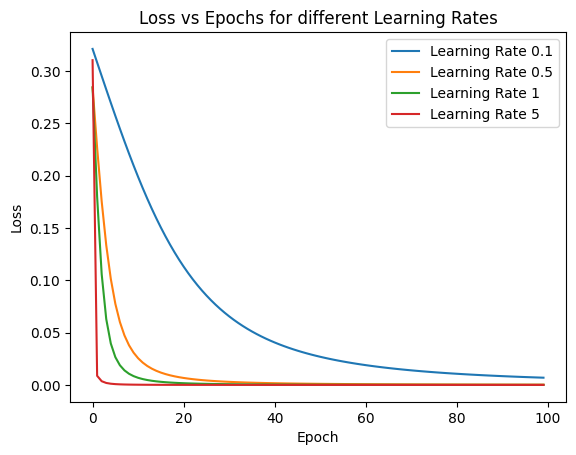

In [47]:
# plotting the graph of all these arrays
import matplotlib.pyplot as plt

plt.plot(loss_list_l1, label = 'Learning Rate 0.1')
plt.plot(loss_list_l2, label = 'Learning Rate 0.5')
plt.plot(loss_list_l3, label = 'Learning Rate 1')
plt.plot(loss_list_l4, label = 'Learning Rate 5')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for different Learning Rates')
plt.legend()

# Show the plot
plt.show()